In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import librosa
import tensorflow as tf
from tensorflow.keras import (
    layers,
    models,
    callbacks,
    losses,
    utils,
    metrics,
    optimizers,
    datasets,
)

In [3]:
Data = pd.DataFrame()
SPECTROGRAM_DIR = r"C:\Users\Jayde\Desktop\library\bird_songs\data\bird_songs\spectrograms"
spectrograms = []
file_names = []
for file in os.listdir(SPECTROGRAM_DIR):
    spect = np.load(f"{SPECTROGRAM_DIR}\{file}")
    spectrograms.append(spect)
    file_names.append(file)
Data["File"] = file_names
Data["Spectrogram"] = spectrograms
Data.head()


,File,Spectrogram
0,nips4b_birds_trainfile001.wav.npy,"[[0.7296142, 0.8457417, 1.0, 0.9285001, 0.7312..."
1,nips4b_birds_trainfile002.wav.npy,"[[0.62644905, 0.6179222, 0.7689847, 0.7917234,..."
2,nips4b_birds_trainfile003.wav.npy,"[[0.51954603, 0.75244635, 0.6157525, 0.703339,..."
3,nips4b_birds_trainfile004.wav.npy,"[[0.7005271, 0.7831872, 0.55465823, 0.71458864..."
4,nips4b_birds_trainfile005.wav.npy,"[[0.586864, 0.6650312, 0.53679466, 0.6137778, ..."


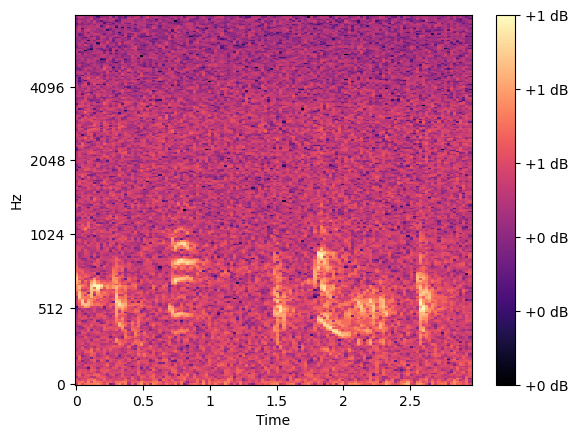

In [4]:
librosa.display.specshow(Data["Spectrogram"][2], y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')

In [23]:
sp = np.array(spectrograms)
sp.shape

(687, 256, 128)

In [33]:
dataset = tf.data.Dataset.from_tensor_slices(spectrograms)
dataset = dataset.batch(batch_size = 64, drop_remainder=True)


In [34]:
dataset.element_spec

TensorSpec(shape=(64, 256, 128), dtype=tf.float32, name=None)

In [36]:
sample = dataset.take(1).get_single_element()
sample.shape

TensorShape([64, 256, 128])